In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set_style('whitegrid')
%matplotlib inline

In [8]:
df = pd.read_csv('../data/raw/application_train.csv')

In [9]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Ver o tamanho do dataset (linhas, colunas)
print(f"O dataset possui {df.shape[0]} linhas (clientes) e {df.shape[1]} colunas (features).\n")

O dataset possui 307511 linhas (clientes) e 122 colunas (features).



In [13]:
# Contar os valores da coluna TARGET
target_counts = df['TARGET'].value_counts()
print(target_counts)

TARGET
0    282686
1     24825
Name: count, dtype: int64


Adimplentes   (0): 91.93%
Inadimplentes (1):8.07%


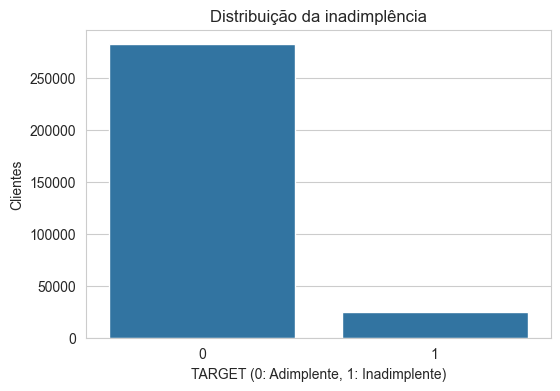

In [19]:
# percentual da proporção

target_percent = df['TARGET'].value_counts(normalize=True) * 100
print(f"Adimplentes   (0): {target_percent[0]:.2f}%")
print(f"Inadimplentes (1):{target_percent[1]:.2f}%")

#Grafico para visualizar a distribuição

plt.figure(figsize=(6,4))
sns.countplot(x='TARGET' , data=df)
plt.title("Distribuição da inadimplência")
plt.ylabel("Clientes")
plt.xlabel("TARGET (0: Adimplente, 1: Inadimplente)")
plt.show()

In [22]:
# calculando os dados faltantes

def calcular_dados_faltantes(dataframe):
    total_faltantes = dataframe.isnull().sum().sort_values(ascending=False)
    percentual_faltantes = ((dataframe.isnull().sum() / len(dataframe)) * 100).sort_values(ascending=False)

    #criando uma tabela com as duas informações
    tabela_faltantes = pd.concat([total_faltantes, percentual_faltantes], axis=1, keys=['Total', 'Porcentagem (%)'])
    
    # Retornar apenas as colunas que de fato têm dados faltantes
     return tabela_faltantes[tabela_faltantes['Total'] > 0]

# Chamar a função e exibir as 20 colunas com mais dados faltantes
dados_faltantes_df = calcular_dados_faltantes(df)
print("Top 20 colunas com dados faltantes:")
dados_faltantes_df.head(20)
    

IndentationError: unexpected indent (2107186531.py, line 8)